In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei'] #支持中文

1.读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看(阅读 参考文章 1、2);

In [4]:
f = open('./task_2_lianjia_data.csv', 'rb')
lianjia_data = pd.read_csv(f)
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


2.利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况(阅读参考 文章 3、4);

In [5]:
gb_count = {'房源数量':'count'}
df2 = lianjia_data.groupby('面积大小（㎡）')['简介（方式·小区名 户型 朝向）'].agg(gb_count)
df2

d:\Work\Py3Dev\pandas\.venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,房源数量
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1
...,...
152,1
155,1
162,1


3.将第(2)问所统计数据，作折线图和条形图，并得出相关结论(阅读参考文章 5、6)，提示:先提取第(2)问 所得数据表的 index 索引，饼转化成 list;再提取【房源数量】的值转成 list(阅读参考文章 7、8);

In [6]:
plt_1_x = df2.index.values.tolist()
plt_1_y= df2['房源数量'].values.tolist()

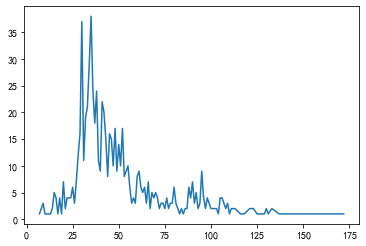

In [7]:
plt.plot(plt_1_x, plt_1_y)
plt.show()

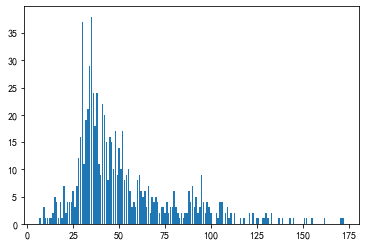

In [8]:
plt.bar(plt_1_x, plt_1_y)
plt.show()

结论：小于1~35㎡房源数量不断递增，大于35㎡房源数量开始递减，峰值出现在35㎡，房源基本集中在30~50㎡中。

4.利用 groupby 函数，以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况;

In [9]:
df4 = lianjia_data.groupby('区')['简介（方式·小区名 户型 朝向）'].agg(gb_count)
df4

d:\Work\Py3Dev\pandas\.venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,房源数量
区,
嘉定,6
奉贤,1
徐汇,126
普陀,22
杨浦,56
松江,45
浦东,106
虹口,24
长宁,86


5.将第(4)问所统计数据，作条形图，并得出相关结论;

In [10]:
plt_2_x_name = df4.index.values.tolist()
plt_2_x = range(len(plt_2_x_name))
plt_2_y = df4['房源数量'].values.tolist()

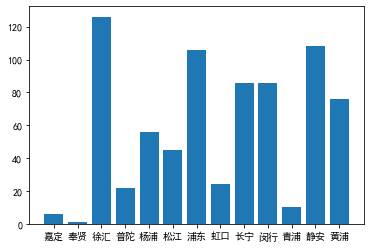

In [11]:
plt.xticks(plt_2_x, plt_2_x_name)
plt.bar(plt_2_x, plt_2_y)
plt.show()

结论：房源最多的是徐汇区，最少的是奉贤区

6.利用 groupby 函数，以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况;

In [12]:
df6 = lianjia_data.groupby('楼层类型')['简介（方式·小区名 户型 朝向）'].agg(gb_count)
df6

d:\Work\Py3Dev\pandas\.venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


7.将第(6)问所统计数据，作饼图(阅读参考文章 9)，并得出相关结论。

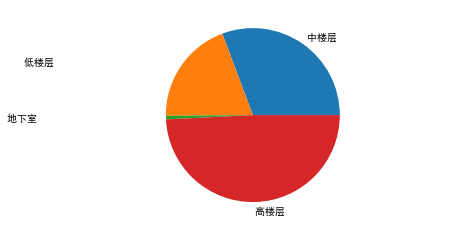

In [13]:
plt_3_x = df6.index.values.tolist()
plt_3_y = df6['房源数量'].values.tolist()
plt.pie(plt_3_y, labels=plt_3_x)
plt.show()

结论：高楼层的房源占比最多，地下室最少